Complete the exercises below For **Assignment #5**.

In this exercise, we are building a logistic regression classification model. We'll work with the [Pima Indians Diabetes Database](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database).  

Load the `tidymodels` library. 

In [1]:
library(tidymodels)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.3.0      ✔ workflows    1.1.4 
✔ parsnip      1.2.1      ✔ workflowsets 1.1.0 
✔ purrr        1.0.2      ✔ yardstick    1.3.1 

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/



The data is located in your homework directory in the `diabetes.csv` file. Read in the data by running the following cell. We are "splitting" the data into training and testing sets. We will evaluate our model's performance with the test set.

In [2]:
diabetes = readr::read_csv('diabetes.csv') |> mutate(Outcome = factor(Outcome))

split = initial_split(diabetes, strata = Outcome)

diabetes_train = training(split)
diabetes_test = testing(split)

Rows: 768 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, D...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Glimpse the `diabetes_train` table.

In [3]:
glimpse(diabetes_train)

Rows: 576
Columns: 9
$ Pregnancies              <dbl> 1, 10, 4, 10, 1, 3, 8, 1, 13, 5, 5, 3, 6, 10,…
$ Glucose                  <dbl> 89, 115, 110, 139, 103, 126, 99, 97, 145, 117…
$ BloodPressure            <dbl> 66, 0, 92, 80, 30, 88, 84, 66, 82, 92, 75, 58…
$ SkinThickness            <dbl> 23, 0, 0, 0, 38, 41, 0, 15, 19, 0, 26, 11, 0,…
$ Insulin                  <dbl> 94, 0, 0, 0, 83, 235, 0, 140, 110, 0, 0, 54, …
$ BMI                      <dbl> 28.1, 35.3, 37.6, 27.1, 43.3, 39.3, 35.4, 23.…
$ DiabetesPedigreeFunction <dbl> 0.167, 0.134, 0.191, 1.441, 0.183, 0.704, 0.3…
$ Age                      <dbl> 21, 29, 30, 57, 33, 27, 50, 22, 57, 38, 60, 2…
$ Outcome                  <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …


❓Which variable is suitable as the "outcome" in a logistic regression model?

**Answer:**

💡Outcome is the only suitable variable as the "outcome" or target/dependent variable in a logistic regression model. The other variables are continuous. Well, some of the others, like Age (above or below a certain age threshold) or Pregnancies (max: 17! Praise be.) might be _coerced_ into being a target variable, but Outcome is really the only choice that makes sense in this dataset.

❓Navigate to [Kaggle page](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) for this dataset. Find descriptions for the `Glucose` and `BMI` columns. Add these descriptions to the [Markdown table](https://www.markdownguide.org/extended-syntax/#tables) below.

| Column name | Description |
| :---------- | :---------- |
| Glucose     | Plasma glucose concentration a 2 hours in an oral glucose tolerance test |
| BMI         | Body mass index (weight in kg/(height in m)^2) |

Make a bar chart showing the frequency of each "outcome" in the `Outcome` column from your `diabetes_train` data.

In [17]:
carolinaBlue = "#7BAFD4"
carolinaNavy = "#13294B"
campusSandstone = "#F4E8DD"

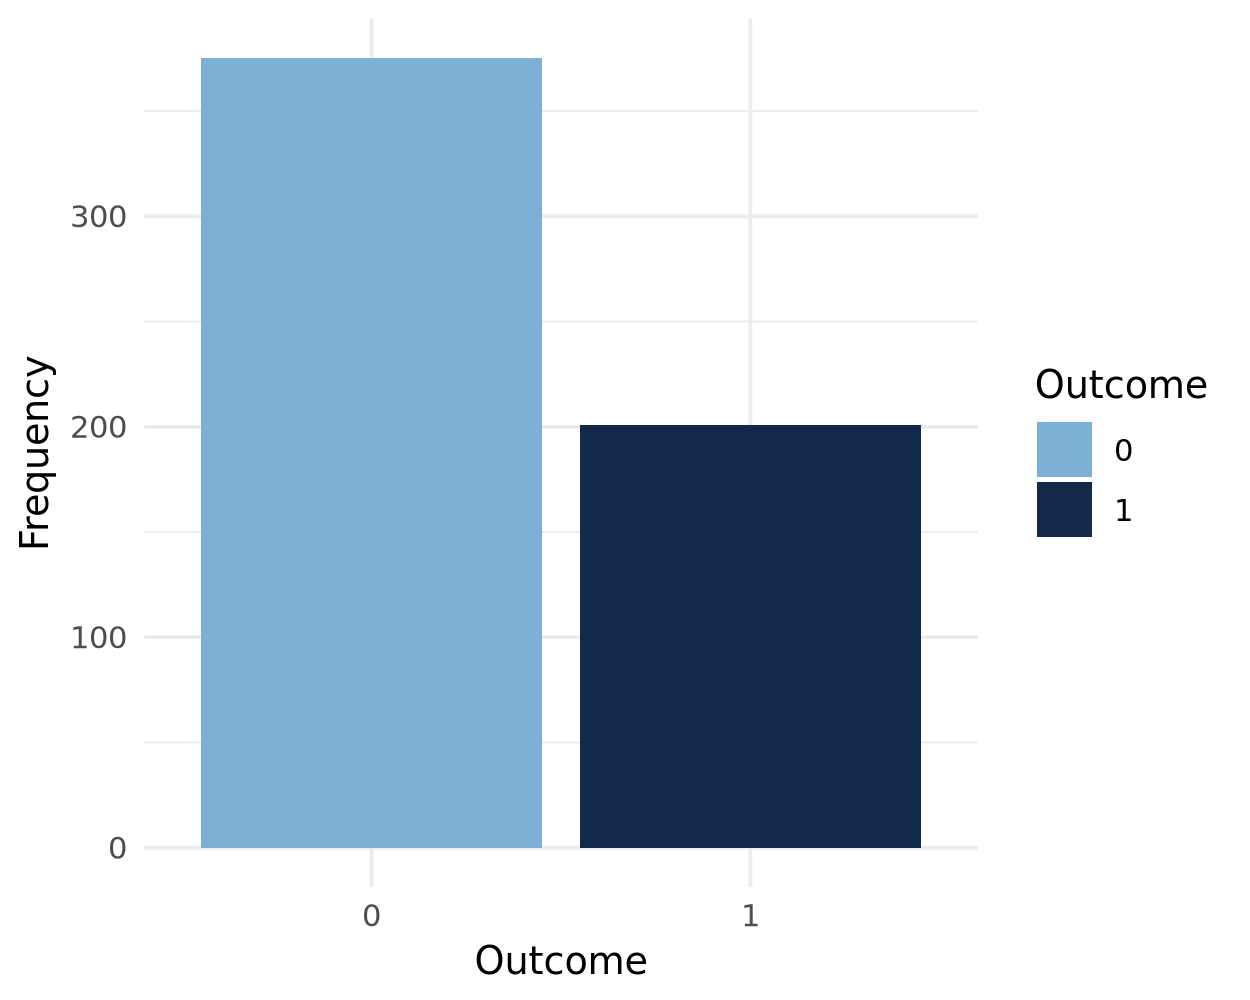

In [66]:
p = ggplot(
        data = diabetes_train,
        mapping = aes(
                    x = Outcome,
                    fill = Outcome
                    )
        ) + geom_bar() + 
            labs(x = "Outcome", y = "Frequency") + 
            scale_fill_manual(values = c(carolinaBlue, carolinaNavy)) +
            theme_minimal() # chart area background

p

❓Is the data balanced? I.e. do we have equal counts of each outcome?

**Answer:**

💡The data is not balanced. Approximately twice as many outcomes are '0' indicating no diabetes as outcome '1' indicating diabetes.

Run the code below to create a table for plotting the predictors we will use in our model: `Glucose` and `BMI`. 

In [21]:
plot_df = diabetes_train |>
    select(Outcome, Glucose, BMI) |>
    pivot_longer(cols = c(Glucose, BMI))

plot_df |> head()

Outcome,name,value
<fct>,<chr>,<dbl>
0,Glucose,89.0
0,BMI,28.1
0,Glucose,115.0
0,BMI,35.3
0,Glucose,110.0
0,BMI,37.6


Using `plot_df`, make a chart showing the relationship of `Glucose` and `BMI` with `Outcome`. 

- use `geom_jitter` for your "geom"
- `facet_wrap` your chart by the `name` variable. (e.g. `facet_wrap(~name, ncol = 2, scales = 'free_x')`)

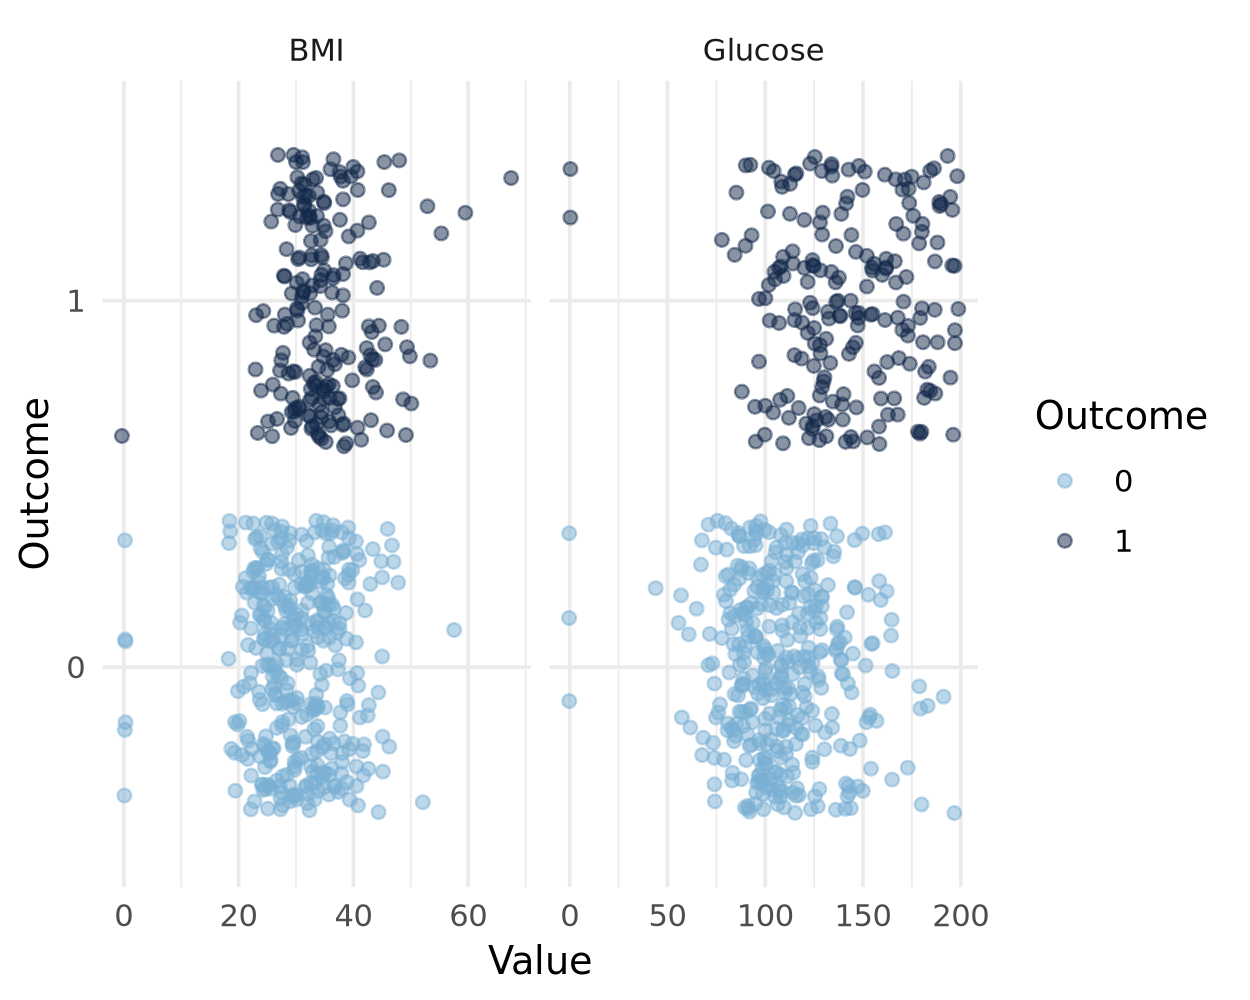

In [56]:
g = ggplot(
        data = plot_df,
        mapping = aes(
                    x = value,
                    y = Outcome,
                    color = Outcome
                    )
        ) + geom_jitter(width = 0.4, alpha = 0.5) +
            labs(x = "Value", y = "Outcome") +
            # facet_wrap(~ name, ncol = 2) + 
            facet_wrap(~ name, ncol = 2, scales = 'free_x') +
            scale_color_manual(values = c(carolinaBlue, carolinaNavy)) +
            theme_minimal() 
g

❓What happens when you remove the `scales = 'free_x'` argument from the `facet_wrap` function?

**Answer:**

💡I had to toggle back and forth between using `scales = 'free_x'` and not using it. I see that it affects the scale of the x-axis. Without this argument, both plots have the same x-axis, that of the larger one: 0 - 200. Using this argument allows each plot to have its own scale on the x-axis, so BMI is scaled 0 - 70 while Glucose is scaled 0 - 200.

Using your training data, build logistic regression model of `Outcome` with `BMI` and `Glucose` as predictors. 
- Use "glm" for you engine
- The formula for your fit function will be `Outcome ~ BMI + Glucose`

In [60]:
# create the model specification
mod = logistic_reg() |> set_engine('glm')

# fit the model; Outcome is target; BMI and Glucose are predictors
mod_fit = mod |> fit(Outcome ~ BMI + Glucose, data = diabetes_train)

# show table
tidy(mod_fit)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-7.13245831,0.669258192,-10.657260,1.612797e-26
BMI,0.06266229,0.015085243,4.153880,3.268845e-05
Glucose,0.03589106,0.003815043,9.407772,5.067629e-21


Using `augment` with your fitted model and the `diabetes_test` data as arguments, create a new dataset called `diabetes_test_wPred` that is the `diabetes_test` table including predictions from your model. 

In [64]:
# using examples from multiple-regression.ipynb
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> head()

.pred_class,.pred_0,.pred_1,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0.9179566,0.08204342,1,85,66,29,0,26.6,0.351,31,0
1,0.3809869,0.61901307,0,137,40,35,168,43.1,2.288,33,1
0,0.7965616,0.20343844,5,116,74,0,0,25.6,0.201,30,0
0,0.5068447,0.49315528,0,118,84,47,230,45.8,0.551,31,1
0,0.6675842,0.33241581,10,125,70,26,115,31.1,0.205,41,1
1,0.3515070,0.64849296,7,147,76,0,0,39.4,0.257,43,1


Run the code below to generate a confusion matrix for your model predictions. 

(❗️Hint: See Table 4.4 from [*Introduction to Statistical Learning (Version 2)*](https://www.statlearning.com/) for an example confusion matrix.)

In [65]:
diabetes_test_wPred = augment(mod_fit, new_data = diabetes_test)

diabetes_test_wPred |> conf_mat(Outcome, .pred_class)

          Truth
Prediction   0   1
         0 110  32
         1  15  35

❓Based on the confusion matrix above, 
- How many individuals had diabetes in your test data?
- Of those that actually had diabetes, how many were predicted to have diabetes by your model?
- How many individuals predicted to have diabetes did not have diabetes?

**Answer:**

💡Based on the confusion matrix above,
- **67** individuals had diabetes.
- The model correctly predicted diabetes for **35** individuals (True Positive).
- The model incorrectly predicted diabetes for **15** individuals who did not have it (False Positive).